#### Proceso de Poisson

Se nos pide simular la ocurrencia de eventos (V. A. N) en un proceso de Poisson con una tasa de $\lambda$ = 5/hora. Como sortear una variable de una distribución de Poisson es dificil, podemos utilizar la relación que existe entre el tiempo entre eventos sucesivos con la distribución exponencial y sortear los saltos entre eventos, que resulta se rmás facil que la primera opción.

El tiempo entre eventos siguen una distribución exponencial de la forma $P_x$(t) = $\lambda$ exp(-$\lambda$ t). Utilizamos el método de la función inversa para construir la inversa de la función distribución acumulada de la  exponencial y así sortear los saltos.

La acumulada se puede calcular integrando $\lambda$ exp(-$\lambda$x) entre 0 y t:

$CDF = P(X<=t) = \int_0^t \lambda exp(-\lambda x) dx = 1 - exp(-\lambda t)$

La función inversa se obtiene igualando a t la expresión anterior:

$F_x^{-1}(t) = -\frac{ln(1-t)}{\lambda}$

Por último, vamos a generar U ~ Uniforme(0,1) para dárselos a la función inversa, y de esa forma generar los X que buscamos:

$X = F_x^{-1} = -\frac{ln(1-U)}{\lambda}$

In [4]:
from random import random
import matplotlib.pyplot as plt
import numpy as np

In [27]:
#calculamos los primeros 100 saltos entre eventos

l = 5
m = 1e3
m = int(m)

#también podemos ir sumando los intervalos de tiempo entre un evento y el siguiente
intervalo_tiempo = 0

#voy a ir contando el número de eventos que ocurren hasta que t=3 hs
N = 0

#para hacer el histograma voy a ir guardando cada N
lista_N = []
numero_experimento = 1e4
numero_experimento = int(numero_experimento)

for p in range(numero_experimento):
    
    N = 0                 #para que cada vez que repita el experimento se olvide de los viejos valores antes calculados
    intervalo_tiempo = 0
    
    for i in range(m):
        U = random()
        X = -np.log(1-U)/l

        intervalo_tiempo = intervalo_tiempo + X
        N = N + 1

        if intervalo_tiempo > 3 :
            break  

       # print(N,intervalo_tiempo)

    lista_N.append(N)

Text(0, 0.5, 'Conteos')

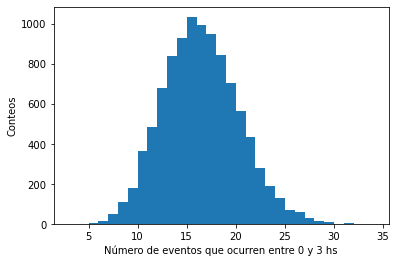

In [29]:
plt.hist(lista_N, bins = 31)
plt.xlabel('Número de eventos que ocurren entre 0 y 3 hs')
plt.ylabel('Conteos')
    